In [1]:
import cv2
import glob
import matplotlib.image as mpimg


image_list = []
image_list_y = []


files = glob.glob('./ScreenShots/*.*')
#fig, axes = plt.subplots(6, 3, figsize = (10,15))
for i, file in enumerate(files):
    #img = mpimg.imread(file)
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #print(img.shape)
    img = cv2.resize(img,(227,227))
    image_list.append(img)
    image_list_y.append(0)

In [2]:
print(len(image_list), len(image_list_y))

90 90


In [3]:
files = glob.glob('./photos/*.*')
#fig, axes = plt.subplots(6, 3, figsize = (10,15))
for i, file in enumerate(files):
    #img = mpimg.imread(file)
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #print(img.shape)
    img = cv2.resize(img,(227,227))
    image_list.append(img)
    image_list_y.append(1)

In [4]:
print(len(image_list), len(image_list_y))

298 298


In [5]:

files = glob.glob('./HANDWRITTEN_DOCS/*.*')
#fig, axes = plt.subplots(6, 3, figsize = (10,15))
for i, file in enumerate(files):
    #img = mpimg.imread(file)
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #print(img.shape)
    img = cv2.resize(img,(227,227))
    image_list.append(img)
    image_list_y.append(2)

In [6]:
print(len(image_list), len(image_list_y))

411 411


In [7]:
files = glob.glob('./CODE/*.*')
#fig, axes = plt.subplots(6, 3, figsize = (10,15))
for i, file in enumerate(files):
    #img = mpimg.imread(file)
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #print(img.shape)
    img = cv2.resize(img,(227,227))
    image_list.append(img)
    image_list_y.append(3)

In [8]:
print(len(image_list), len(image_list_y))

545 545


In [9]:
files = glob.glob('./doc/*.*')
#fig, axes = plt.subplots(6, 3, figsize = (10,15))
for i, file in enumerate(files):
    #img = mpimg.imread(file)
    img = cv2.imread(file)
    #print(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #print(img.shape)
    img = cv2.resize(img,(227,227))
    image_list.append(img)
    image_list_y.append(4)

In [10]:
print(len(image_list), len(image_list_y))

704 704


In [13]:
import numpy as np
import pickle
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
data_pickle = {}
data_pickle["train"] = np.array(image_list)
data_pickle["label"] = np.array(image_list_y)
pickle.dump( data_pickle, open( "./pickle_data/data_pickle.p", "wb" ))

In [14]:
#Load the dat from pickle file
data_pickle = pickle.load(open( "./pickle_data/data_pickle.p", "rb" ))
X_train = data_pickle["train"]
y_train = data_pickle["label"]

In [15]:
print(X_train.shape, y_train.shape)

(704, 227, 227, 3) (704,)


In [16]:
%pwd

'C:\\Users\\Nixon\\Desktop\\SDC\\Document Classification\\image_classify'

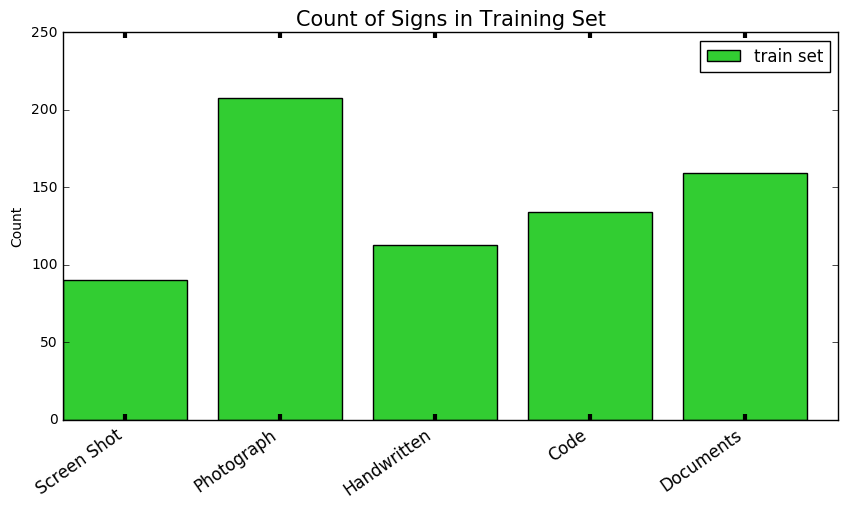

In [22]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Visualizations will be shown in the notebook.
%matplotlib inline

# Example data
sign, counts = np.unique(y_train, return_counts = True)
#test_sign, test_counts = np.unique(y_test, return_counts = True)
sign_values = np.genfromtxt('signnames.txt',  dtype='U', delimiter=',' , skip_header =1)
#print(sign.shape)
sign_names = sign_values[:,1]
#print(len(sign), len(counts))


fig, ax = plt.subplots(figsize = (10, 5))
plt.bar(sign, counts, color = 'limegreen', label = 'train set')
#plt.bar(test_sign, test_counts, color = 'g', label = 'test_set')
plt.xticks(np.arange(5) + 0.4 , sign_names, rotation='35', fontsize = 12, ha = 'right')
#plt.xticks(np.arange(43) + 0.4 , [sign_name[i] for i in range(43)], rotation='35', fontsize = 12, ha = 'right')
ax.xaxis.set_tick_params(width=3)
ax.set_title('Count of Signs in Training Set', fontsize = 15)
#ax.set_yticks(y_pos)
ax.set_ylabel('Count')
#ax.invert_yaxis()  # labels read top-to-bottom
plt.legend();
plt.show()

### Randomly show the images

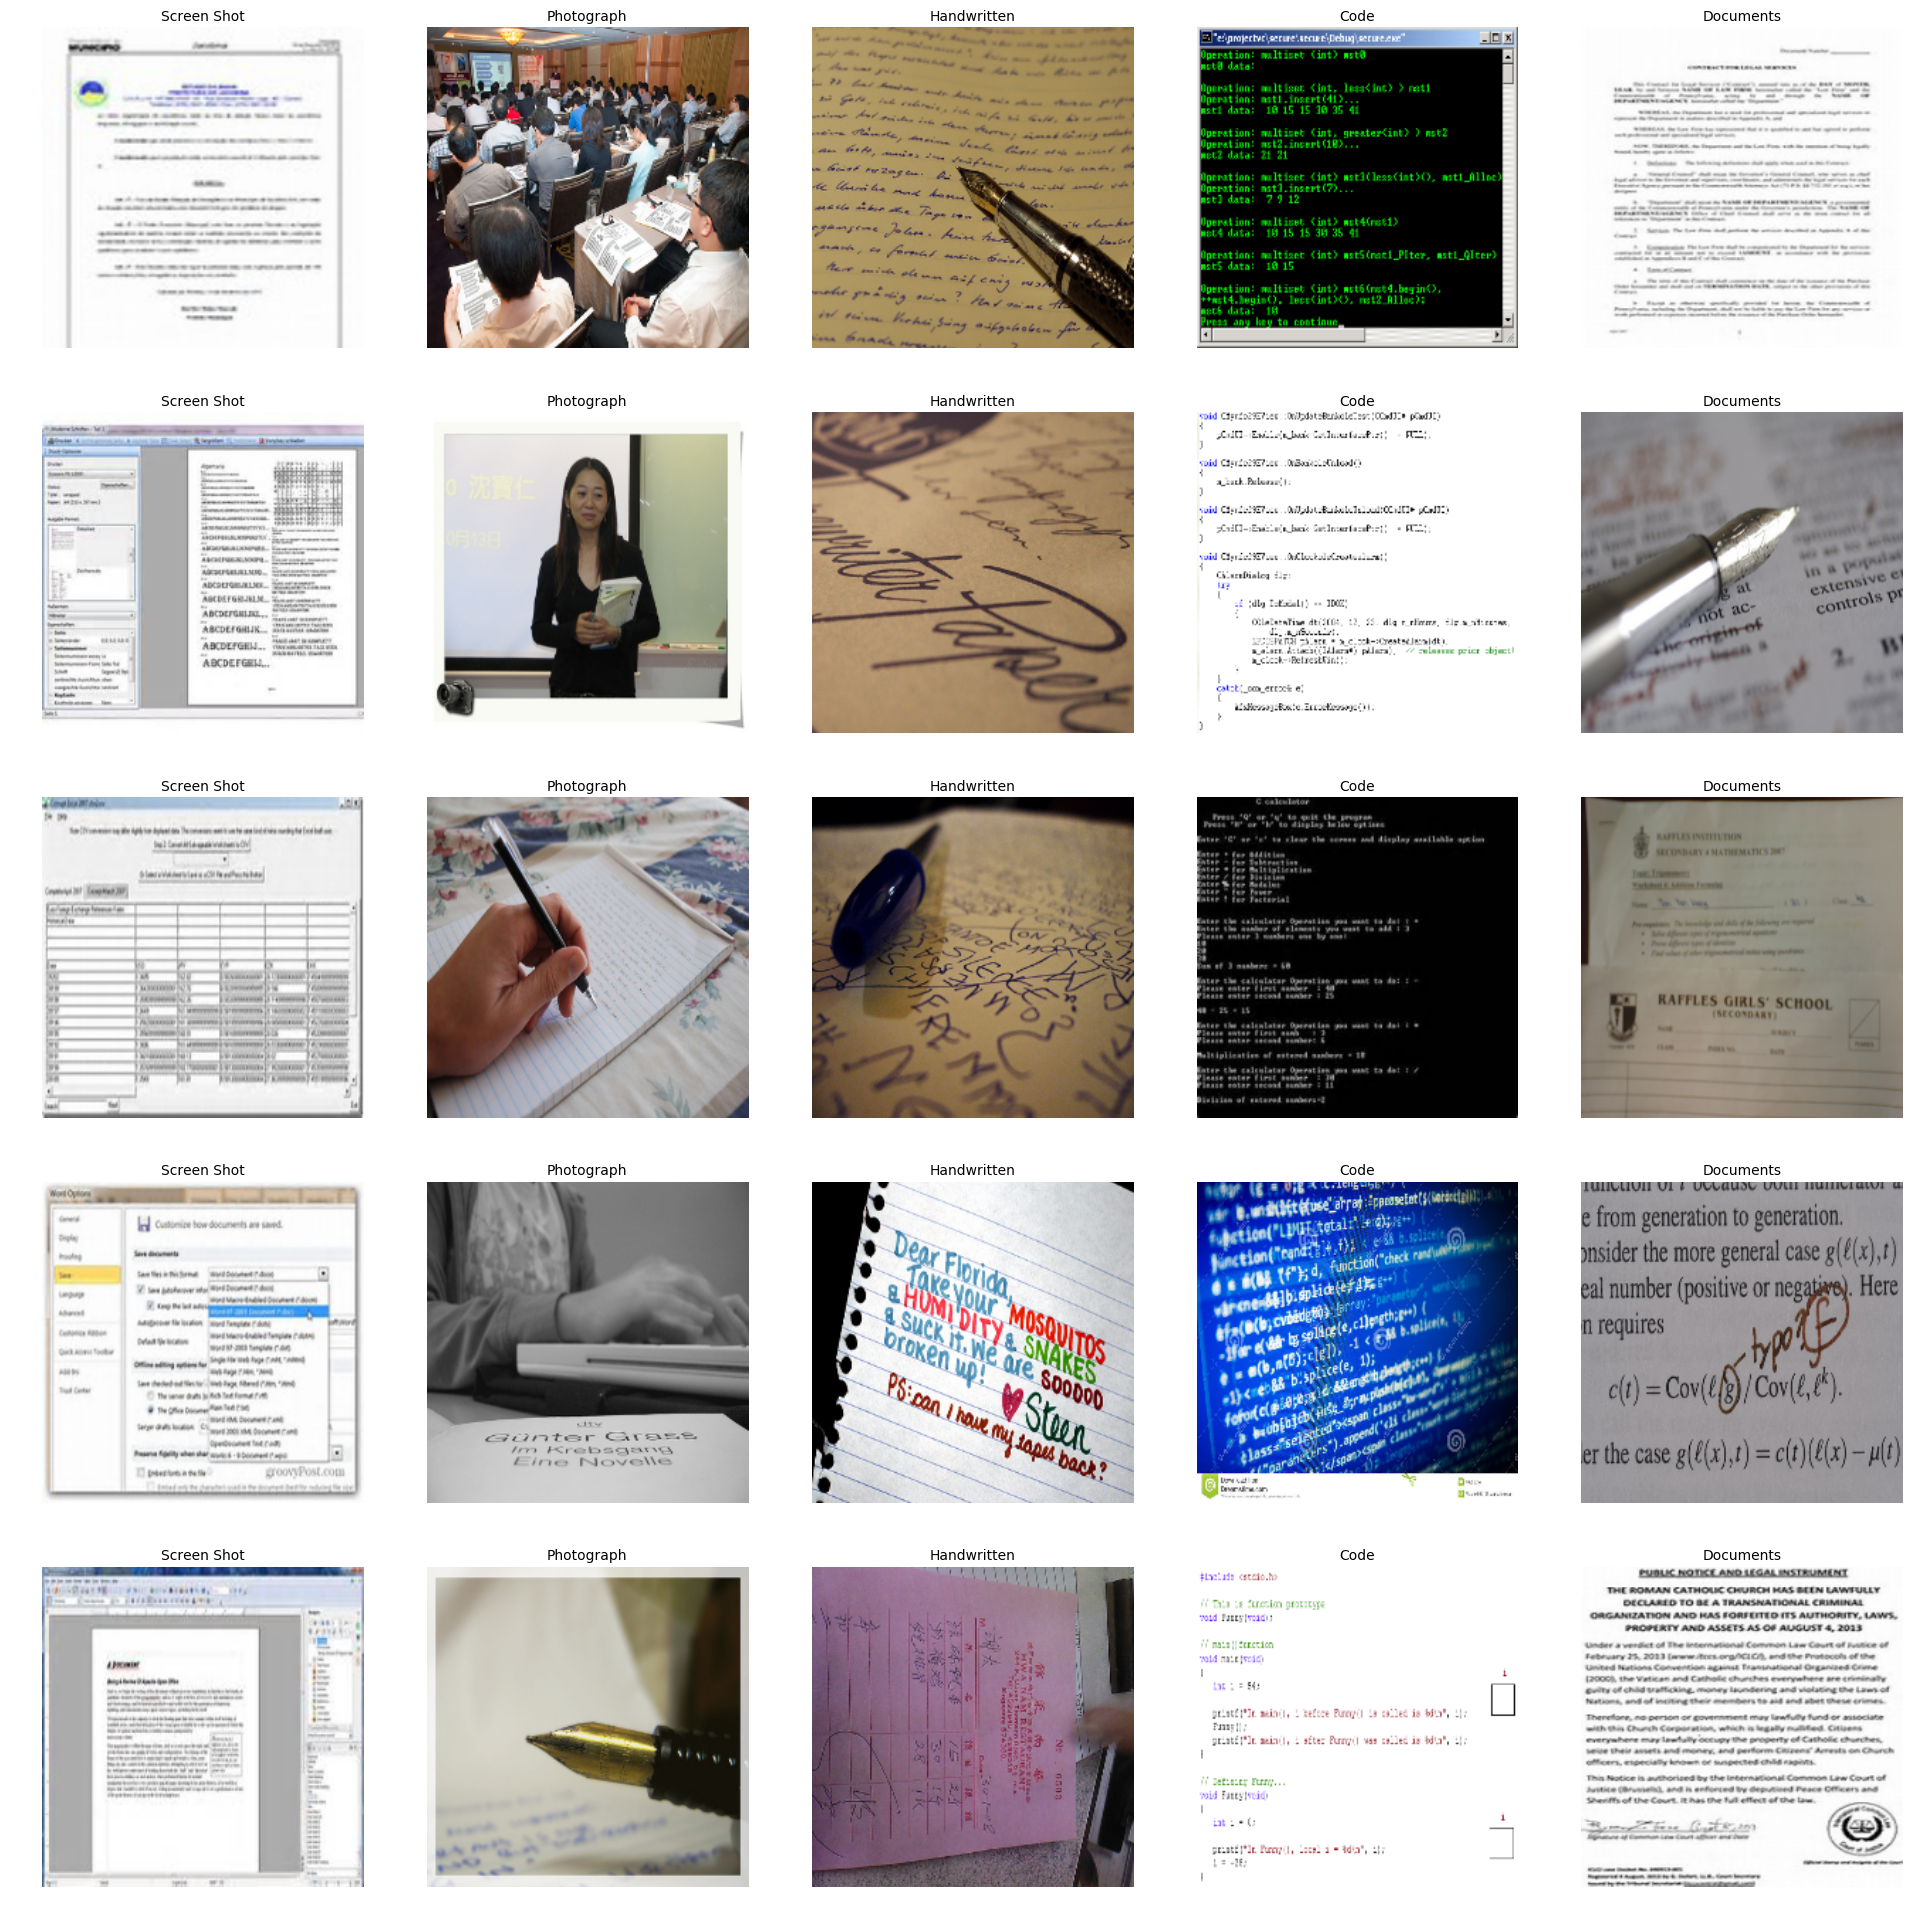

In [24]:
fig, axes = plt.subplots(5,5, figsize = (24, 24))
plt.axis('off')
for i in range(25):
    #print(np.where(y_train==(i%43))[0])
    index = np.random.choice(np.where(y_train==(i%5))[0])
    #index = np.random.choice(indices_of_label[i%43])
    axes.flat[i].imshow(X_train[index])
    axes.flat[i].set_title(sign_names[i%5], fontsize = 10)
    axes.flat[i].axis('off')

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=0)

In [27]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(471, 227, 227, 3) (471,)
(233, 227, 227, 3) (233,)


In [ ]:
import pickle
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from alexnet import AlexNet

nb_classes = 5
epochs = 10
batch_size = 50

#with open('./train.p', 'rb') as f:
#    data = pickle.load(f)

#X_train, X_val, y_train, y_val = train_test_split(data['features'], data['labels'], test_size=0.33, random_state=0)

features = tf.placeholder(tf.float32, (None, 227, 227, 3))
labels = tf.placeholder(tf.int64, None)
#resized = tf.image.resize_images(features, (227, 227))

# Returns the second final layer of the AlexNet model,
# this allows us to redo the last layer for the traffic signs
# model.
fc7 = AlexNet(features, feature_extract=True)
fc7 = tf.stop_gradient(fc7)
shape = (fc7.get_shape().as_list()[-1], nb_classes)
fc8W = tf.Variable(tf.truncated_normal(shape, stddev=1e-2))
fc8b = tf.Variable(tf.zeros(nb_classes))
logits = tf.nn.xw_plus_b(fc7, fc8W, fc8b)

cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, labels)
loss_op = tf.reduce_mean(cross_entropy)
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op, var_list=[fc8W, fc8b])
init_op = tf.global_variables_initializer()

preds = tf.arg_max(logits, 1)
accuracy_op = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))


def eval_on_data(X, y, sess):
    total_acc = 0
    total_loss = 0
    for offset in range(0, X.shape[0], batch_size):
        end = offset + batch_size
        X_batch = X[offset:end]
        y_batch = y[offset:end]

        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={features: X_batch, labels: y_batch})
        total_loss += (loss * X_batch.shape[0])
        total_acc += (acc * X_batch.shape[0])

    return total_loss/X.shape[0], total_acc/X.shape[0]

with tf.Session() as sess:
    sess.run(init_op)

    for i in range(epochs):
        # training
        X_train, y_train = shuffle(X_train, y_train)
        t0 = time.time()
        for offset in range(0, X_train.shape[0], batch_size):
            end = offset + batch_size
            sess.run(train_op, feed_dict={features: X_train[offset:end], labels: y_train[offset:end]})

        val_loss, val_acc = eval_on_data(X_val, y_val, sess)
        print("Epoch", i+1)
        print("Time: %.3f seconds" % (time.time() - t0))
        print("Validation Loss =", val_loss)
        print("Validation Accuracy =", val_acc)
        print("")
